# Auto Encoder
## 비지도학습 중 하나

In [0]:
import os,warnings
warnings.filterwarnings(action='ignore')

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('./mnist/data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습율 0.01
training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
batch_size = 100 # 배치 사이즈 100
n_hidden = 256 # 은닉층의 노드 개수 256
n_input = 28 * 28 # 784개 (입력층)

# 인코더(encoder) 만들기
- STEP 01. 맨처음은 n_hidden개의 뉴런을 가지는 은닉층을 만들기
- STEP 02. 가중치(W)와 편향 변수(B)를 원하는 뉴런의 개수만큼 설정.
- STEP 03. 활성화 함수 sigmoid 함수를 적용.
기억해두기, n_input(입력층 노드) 값보다 n_hidden(은닉층 노드) 값이 더 작다.
 - 항상 그런것이 아니라 은닉층이 더 큰 오토인코더 모델도 있음

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden])) # W의 지정
b_encode = tf.Variable(tf.random_normal([n_hidden])) #
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode)) #

# 디코더(decoder) 만들기
- Tip01. 여기서 입력값은 은닉층의 노드수가 된다.
- Tip02. 출력값을 입력층의 크기로 만듬.
- 은닉층 데이터를 디코더를 통해 출력층으로 내보낸다.
- 만들어진 출력값을 입력값과 비슷해 지도록 만드는 가중치를 찾는다.

In [0]:
W_decode=tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode=tf.Variable(tf.random_normal([n_input]))
decoder=tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

cost=tf.reduce_mean(tf.pow(X-decoder,2))

In [0]:
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

iteration=int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost=0
    
    for i in range(iteration):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,loss=sess.run([optimizer,cost],feed_dict={X:batch_xs})
        total_cost+=loss
        
    print('Epoch:', '%04d' % (epoch + 1),'Avg. cost=', '{:.4f}'.format(total_cost / iteration))

print('최적화 완료!')

Epoch: 0001 Avg. cost= 0.2042
Epoch: 0002 Avg. cost= 0.0624
Epoch: 0003 Avg. cost= 0.0472
Epoch: 0004 Avg. cost= 0.0404
Epoch: 0005 Avg. cost= 0.0372
Epoch: 0006 Avg. cost= 0.0349
Epoch: 0007 Avg. cost= 0.0336
Epoch: 0008 Avg. cost= 0.0317
Epoch: 0009 Avg. cost= 0.0305
Epoch: 0010 Avg. cost= 0.0301
Epoch: 0011 Avg. cost= 0.0297
Epoch: 0012 Avg. cost= 0.0292
Epoch: 0013 Avg. cost= 0.0288
Epoch: 0014 Avg. cost= 0.0285
Epoch: 0015 Avg. cost= 0.0283
Epoch: 0016 Avg. cost= 0.0282
Epoch: 0017 Avg. cost= 0.0280
Epoch: 0018 Avg. cost= 0.0279
Epoch: 0019 Avg. cost= 0.0277
Epoch: 0020 Avg. cost= 0.0275
최적화 완료!


In [0]:
sample_size=10
samples=sess.run(decoder,feed_dict={X:mnist.test.images[:sample_size]})
samples.shape

(10, 784)

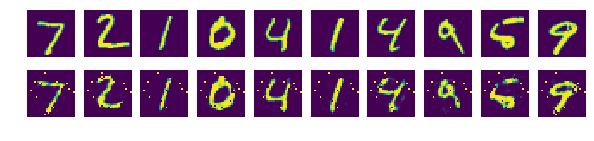

In [0]:
fig, ax= plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
    
plt.show()

## Usage
- Password
- 비정상거래 검출